In [ ]:
!pip install transformers

In [6]:
!pip install tf-keras

   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ------------------------------------ --- 1.6/1.7 MB 11.9 MB/s eta 0:00:01
   ---------------------------------------- 1.7/1.7 MB 4.7 MB/s eta 0:00:00


In [2]:
# Text Processing
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Sentiment Analysis
from transformers import pipeline

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Example text for analysis
text = """
I am so happy and excited about my new job! However, I feel a bit nervous about the challenges ahead. 
Sometimes, I get frustrated when things don't go as planned.
"""


In [4]:
# Initialize lemmatizer and stop words
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Tokenize the text
tokens = word_tokenize(text)

# Remove stop words and lemmatize
processed_tokens = [
    lemmatizer.lemmatize(token.lower()) 
    for token in tokens 
    if token.isalnum() and token.lower() not in stop_words
]

print("Processed Tokens:", processed_tokens)


Processed Tokens: ['happy', 'excited', 'new', 'job', 'however', 'feel', 'bit', 'nervous', 'challenge', 'ahead', 'sometimes', 'get', 'frustrated', 'thing', 'go', 'planned']


In [7]:
# Initialize emotion analysis model
emotion_model = pipeline("text-classification", model="j-hartmann/emotion-english-distilroberta-base", top_k=None)

# Analyze emotions for the input text
emotions = emotion_model(text)
print("Emotion Analysis with Pre-trained Model:", emotions)


tf_model.h5:   0%|          | 0.00/329M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at j-hartmann/emotion-english-distilroberta-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


tokenizer_config.json:   0%|          | 0.00/294 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

Device set to use 0


Emotion Analysis with Pre-trained Model: [[{'label': 'fear', 'score': 0.845206081867218}, {'label': 'joy', 'score': 0.1415574997663498}, {'label': 'sadness', 'score': 0.003964876290410757}, {'label': 'surprise', 'score': 0.003318947507068515}, {'label': 'anger', 'score': 0.0029613818041980267}, {'label': 'neutral', 'score': 0.002484560012817383}, {'label': 'disgust', 'score': 0.000506698212120682}]]


In [13]:
# Assuming the file "emotions.txt" contains the text
emotions_dict = {}

with open("emotions.txt", "r") as emotions:
    for line in emotions:
        clearline = line.replace('\n', '').strip()  # Remove newline and strip extra spaces
        if ':' in clearline:  # Ensure the line has key-value structure
            key, value = clearline.split(':')  # Split into key and value
            emotions_dict[key.strip("' ").strip()] = value.strip("' ").strip()  # Add to dictionary

# Print the resulting dictionary
print(emotions_dict)


{'victimized': "sad',", 'accused': "cheated',", 'acquitted': "singled out',", 'adorable': "loved',", 'adored': "loved',", 'affected': "attracted',", 'afflicted': "sad',", 'aghast': "fearful',", 'agog': "attracted',", 'agonized': "sad',", 'alarmed': "fearful',", 'amused': "happy',", 'angry': "angry',", 'anguished': "sad',", 'animated': "happy',", 'annoyed': "angry',", 'anxious': "attracted',", 'apathetic': "apathetic',", 'appalled': "angry',", 'appeased': "singled out',", 'appreciated': "esteemed',", 'apprehensive': "anxious',", 'approved of': "loved',", 'ardent': "lustful',", 'aroused': "lustful',", 'attached': "attached',", 'attracted': "attracted',", 'autonomous': "free',", 'awed': "fearful',", 'awkward': "embarrassed',", 'beaten down': "powerless',", 'beatific': "happy',", 'belonging': "attached',", 'bereaved': "sad',", 'betrayed': "cheated',", 'bewildered': "surprise',", 'bitter': "angry',", 'blissful': "happy',", 'blithe': "happy',", 'blocked': "powerless',", 'blue': "sad',", 'boi

In [16]:
emotion_counts = {}
for token in processed_tokens:
    emotion = emotions_dict.get(token, "neutral")
    emotion_counts[emotion] = emotion_counts.get(emotion, 0) + 1

print("Emotion Counts from Lexicon:", emotion_counts)

Emotion Counts from Lexicon: {"happy',": 1, "adequate',": 1, 'neutral': 12, "fearful',": 1, "angry',": 1}


C:\Users\USER\AppData\Local\Temp\ipykernel_9424\1829538100.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=emotion_labels, y=emotion_values, palette="viridis")


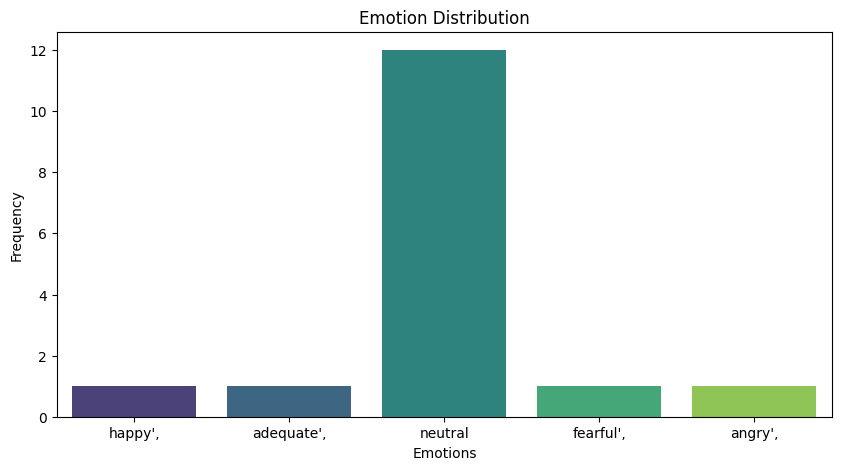

In [17]:
# Aggregate emotion counts (example for both methods)
emotion_labels = list(emotion_counts.keys())
emotion_values = list(emotion_counts.values())

# Visualization
plt.figure(figsize=(10, 5))
sns.barplot(x=emotion_labels, y=emotion_values, palette="viridis")
plt.title("Emotion Distribution")
plt.xlabel("Emotions")
plt.ylabel("Frequency")
plt.show()
